# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Muhammad Haris
- **Email:** idris.munu@gmail.com
- **ID Dicoding:** muhdharis28

## Menentukan Pertanyaan Bisnis

- Kategori produk apa yang paling banyak dan paling sedikit dipesan?
- State mana yang memiliki jumlah customer terbanyak?
- RFM Analysis
> - Kapan terakhir pelanggan melakukan pemesanan?
> - Seberapa sering seorang pelanggan melakukan pemesanan dalam beberapa bulan terakhir?
> - Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?


## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Pada analisis data ini, kita akan mengolah data e-commerce yang terdiri dari beberapa tabel: `customers_df`, `orders_df`, `product_df`, dan `order_items_df`. Data tersebut mencakup informasi tentang pelanggan, pesanan, produk, dan item pesanan.

Pertama-tama, kita memuat data dari file CSV dan menggunakan function `read_csv()`.

In [2]:
customers_df = pd.read_csv("https://raw.githubusercontent.com/muhdharis28/submission_dataset/main/customers_dataset.csv")
customers_df.head()

orders_df = pd.read_csv("https://raw.githubusercontent.com/muhdharis28/submission_dataset/main/orders_dataset.csv")
orders_df.head()

product_df = pd.read_csv("https://raw.githubusercontent.com/muhdharis28/submission_dataset/main/products_dataset.csv")
product_df.head()

order_items_df = pd.read_csv("https://raw.githubusercontent.com/muhdharis28/submission_dataset/main/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### Assessing Data

kemudian menyelidiki struktur dan informasi dasar dari setiap tabel menggunakan method `head()`, `info()`, dan `describe()`

In [3]:
customers_df.info()
customers_df.isna().sum()
print("Jumlah duplikasi: ", customers_df.duplicated().sum())
customers_df.describe()

orders_df.info()
orders_df.isna().sum()
print("Jumlah duplikasi: ",orders_df.duplicated().sum())
orders_df.describe()

product_df.info()
product_df.isna().sum()
print("Jumlah duplikasi: ", product_df.duplicated().sum())
product_df.describe()

order_items_df.info()
order_items_df.isna().sum()
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())
order_items_df.describe()

customers_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
Jumlah duplikasi:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       9944

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### Cleaning Data

Setelah memuat data, langkah selanjutnya adalah membersihkan data dari nilai yang hilang dan tipe data yang salah. Kita menggunakan method `dropna()` untuk menghapus baris yang mengandung nilai NaN dan mengganti tipe data pada kolom date menjadi datetime. Proses ini dapat dilakukan menggunakan method `to_datetime()` yang disediakan oleh library pandas.

In [4]:
orders_df.dropna(axis=0, inplace=True)
orders_df.isna().sum()

orders_df_datetime_columns = [
    "order_purchase_timestamp",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date",
    "order_approved_at"
]
for column in orders_df_datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.info()

product_df.dropna(axis=0, inplace=True)
product_df.isna().sum()
product_df.info()

order_items_df_datetime_columns = [
    "shipping_limit_date"
]
for column in order_items_df_datetime_columns:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ---

## Exploratory Data Analysis (EDA)

### Explore ...

Setelah data bersih, kita melakukan eksplorasi data dengan menghitung statistik ringkasan, seperti jumlah pelanggan per kota, jumlah pesanan per negara bagian, dll.

In [5]:
customers_df.describe(include="all")
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)
customers_df.groupby(by="customer_zip_code_prefix").customer_id.nunique().sort_values(ascending=False)
customers_df.head()

delivery_time = orders_df["order_estimated_delivery_date"] - orders_df["order_delivered_carrier_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)

orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)

orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)
orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

product_df.describe(include="all")
order_items_df.describe(include="all")

order_items_product_df = pd.merge(
    left=order_items_df,
    right=product_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
order_items_product_df.sort_values(by="price", ascending=False)

order_items_product_df.groupby(by="product_category_name").agg({
    "order_item_id": "nunique",
    "price": ["min", "max"]
})

all_df = pd.merge(
    left=order_items_product_df,
    right=orders_customers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

all_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,9.0,871766c5855e863f6eccc05f988b23cb,28013.0,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,10.0,eb28e67c4c0b83846050ddfb8a35d051,15775.0,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,19.0,3818d81c6709e39d06b2738a8d3a2474,35661.0,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,9.0,af861d436cfc08b2c2ddefd0ba074622,12952.0,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,29.0,64b576fb70d441e8f1b2d7d446e483c5,13226.0,varzea paulista,SP


## Visualization & Explanatory Analysis

Kita juga melakukan visualisasi data menggunakan bar plot untuk menampilkan informasi yang relevan, seperti kategori produk terbaik dan terburuk berdasarkan jumlah pesanan. Selanjutnya, kita menganalisis RFM (Recency, Frequency, Monetary) dari pelanggan. Kita menghitung parameter RFM untuk setiap pelanggan dan membuat visualisasi data dengan menggunakan bar plot untuk menampilkan pelanggan terbaik berdasarkan parameter RFM.

### Pertanyaan 1:

C:\Users\USER\AppData\Local\Temp\ipykernel_11040\1472921699.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_item_id", y="product_category_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
C:\Users\USER\AppData\Local\Temp\ipykernel_11040\1472921699.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_item_id", y="product_category_name", data=sum_order_items_df.sort_values(by="order_item_id", ascending=True).head(5), palette=colors, ax=ax[1])


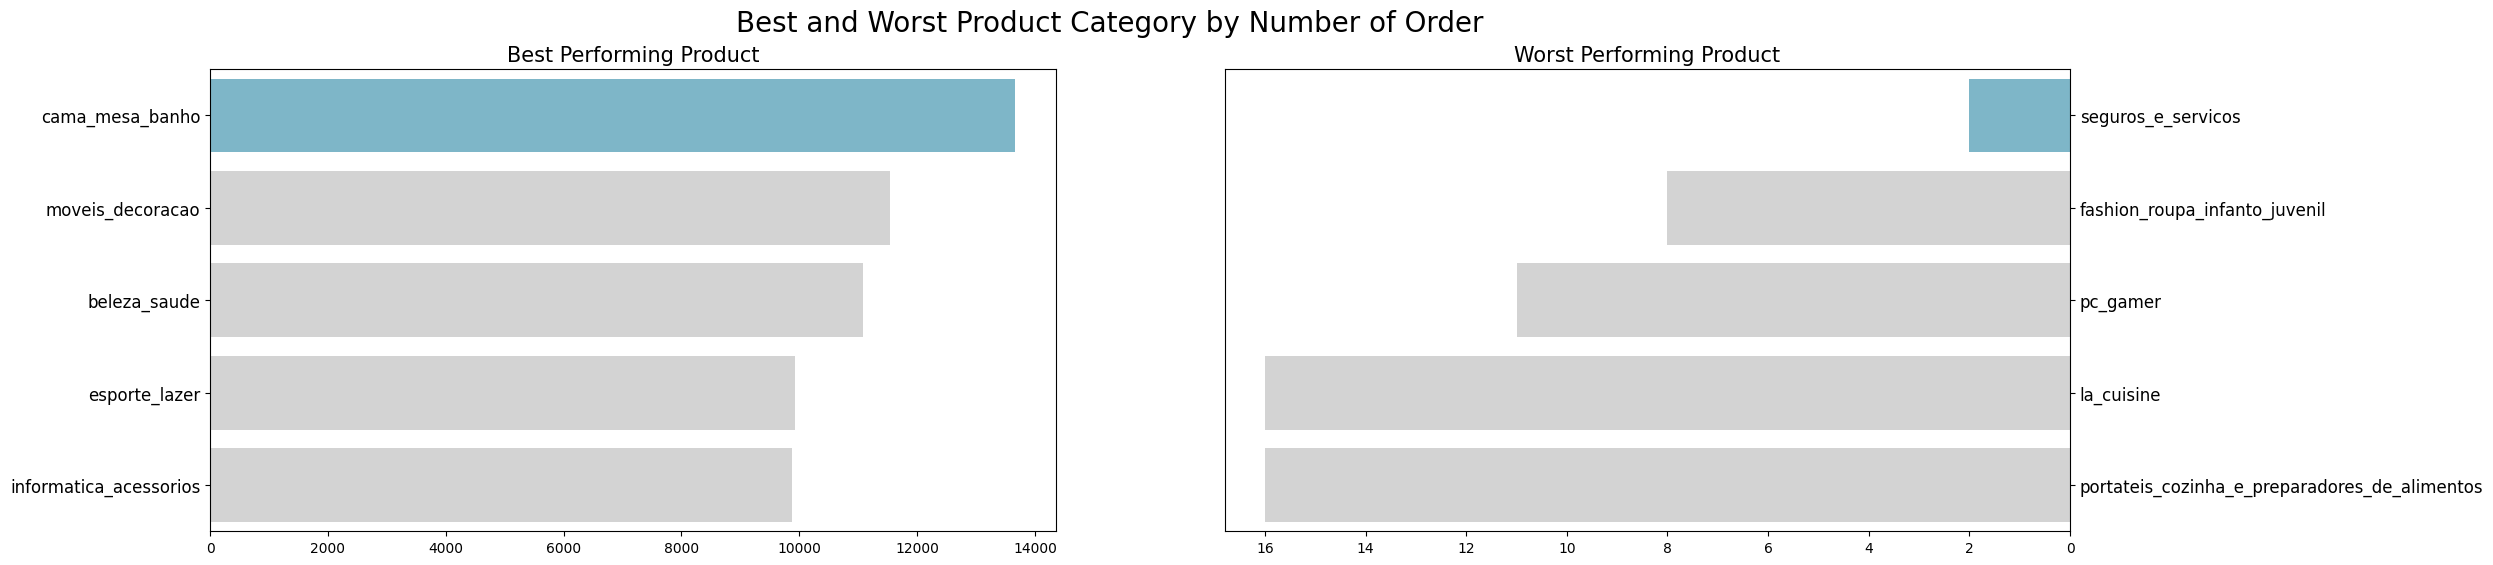

In [6]:
sum_order_items_df = all_df.groupby("product_category_name").order_item_id.sum().sort_values(ascending=False).reset_index()
sum_order_items_df.head(15)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="order_item_id", y="product_category_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="order_item_id", y="product_category_name", data=sum_order_items_df.sort_values(by="order_item_id", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Product Category by Number of Order", fontsize=20)
plt.show()

### Pertanyaan 2:

C:\Users\USER\AppData\Local\Temp\ipykernel_11040\488584328.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\USER\AppData\Local\Temp\ipykernel_11040\488584328.py:8: UserWarning: 
The palette list has fewer values (8) than needed (27) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


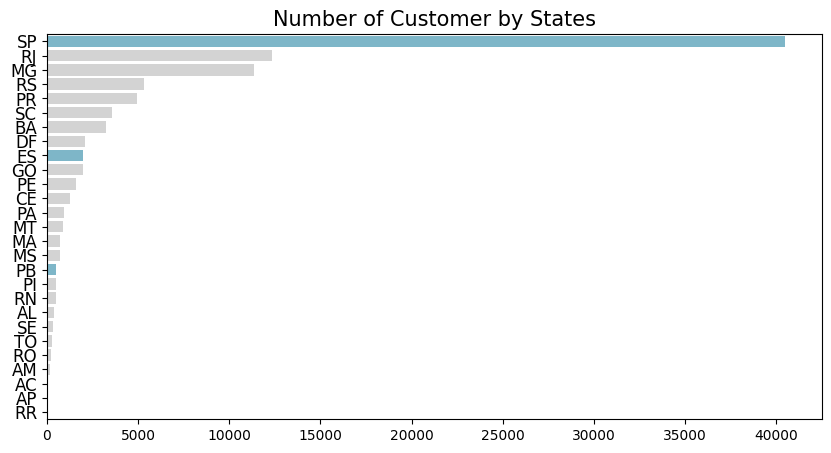

In [7]:
bycustomer_state_df = all_df.groupby(by="customer_state").customer_id.nunique().reset_index()
bycustomer_state_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)

plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="customer_count",
    y="customer_state",
    data=bycustomer_state_df.sort_values(by="customer_count", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by States", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

### Pertanyaan 3:

C:\Users\USER\AppData\Local\Temp\ipykernel_11040\3897884368.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_unique_id", data=rfm_df.sort_values(by="recency", ascending=False).head(5), palette=colors, ax=ax[0])
C:\Users\USER\AppData\Local\Temp\ipykernel_11040\3897884368.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_unique_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
C:\Users\USER\AppData\Local\Temp\ipykernel_11040\3897884368.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `

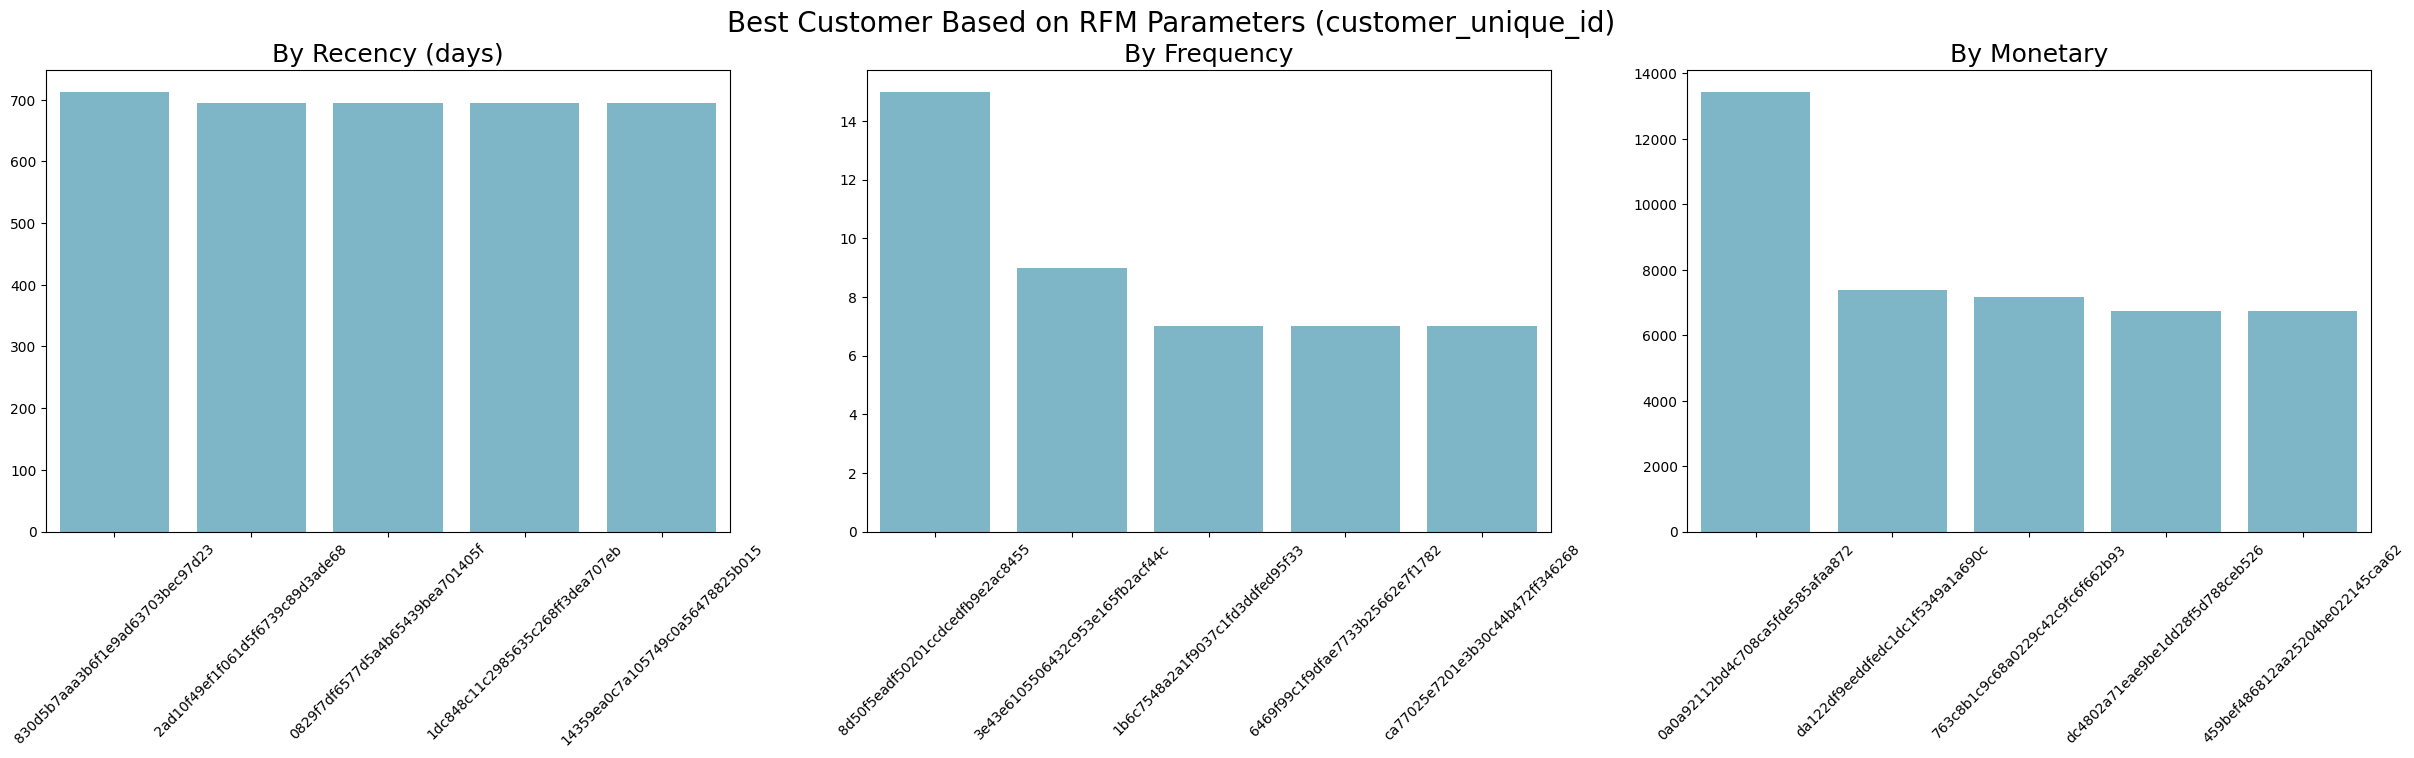

In [8]:
rfm_df = all_df.groupby(by="customer_unique_id", as_index=False).agg({
    "order_approved_at": "max",
    "order_id": "nunique",
    "price": "sum"
})
rfm_df.columns = ["customer_unique_id", "max_order_timestamp", "frequency", "monetary"]

rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_approved_at"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_unique_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=10, rotation=45)

sns.barplot(y="frequency", x="customer_unique_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=10, rotation=45)

sns.barplot(y="monetary", x="customer_unique_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=10, rotation=45)

plt.suptitle("Best Customer Based on RFM Parameters (customer_unique_id)", fontsize=20)
plt.show()

## Conclusion

- Conclution pertanyaan 1: best product category berdasarkan jumlah order adalah casa_mesa_banho, lalu worst product category berdasarkan jumlah order adalah seguros e servicos

- Conclution pertanyaan 2: state yang memiliki jumlah customer terbanyak adalah SP.

- Conclution pertanyaan 3: hasil RFM analysis diatas menunjukan untuk tingkat recency rata-rata diangka 600 keatas. Kemudian frekuensi tertinggi mencapai angka 14. Dan terakhir monetary tertinggi berada diangka 12000 keatas.